<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S---Regression-Classification/blob/main/Linear_Regression/Mahfuzur_Rahman_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tech-i-s/data-science-course-wiki/master/Step%203-1%20Linear%20Regression/Project/SeoulBikeData.csv?token=AM2M2N3JH2IYHR35LJHUOVTAEWVTY')

In [3]:
df['Id'] = df.index

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Id
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4


In [5]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Id                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  Id      

In [8]:
x = set(df.Seasons)
y = set(df.Holiday)
z = set(df['Functioning Day'])
print(x)
print(y)
print(z)

{'Winter', 'Autumn', 'Spring', 'Summer'}
{'Holiday', 'No Holiday'}
{'No', 'Yes'}


In [9]:
import numpy as np

In [10]:
x = df[['Rented Bike Count','Seasons']]
x = x.groupby('Seasons').sum()
x.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


In [11]:
x = df[['Rented Bike Count','Holiday']]
x = x.groupby('Holiday').sum()
x.head()

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


In [12]:
x = df[['Rented Bike Count','Functioning Day']]
x = x.groupby('Functioning Day').sum()
x.head()

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


In [13]:
df = df[df['Functioning Day']=='Yes']

In [14]:
df = df.select_dtypes(include = ['int64', 'float64'])
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Id
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,8755
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,8756
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,8757
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,8758


In [15]:
df.isnull().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Id                          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.30)

In [17]:
train.shape

(5925, 11)

In [18]:
test.shape

(2540, 11)

In [19]:
data_corr = train.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Id
Rented Bike Count,1.000000,0.422494,0.560645,-0.210990,0.122490,0.214728,0.395073,0.273620,-0.136549,-0.151255,0.392241
Hour,0.422494,1.000000,0.121969,-0.235153,0.289524,0.093947,0.004602,0.141660,0.015918,-0.016886,0.005614
Temperature(C),0.560645,0.121969,1.000000,0.165181,-0.038151,0.032551,0.914053,0.346608,0.056116,-0.221144,0.583330
Humidity(%),-0.210990,-0.235153,0.165181,1.000000,-0.334004,-0.544497,0.539407,-0.459711,0.250187,0.104596,0.161422
Wind speed (m/s),0.122490,0.289524,-0.038151,-0.334004,1.000000,0.171102,-0.175354,0.325343,-0.029054,-0.001682,-0.155344
Visibility (10m),0.214728,0.093947,0.032551,-0.544497,0.171102,1.000000,-0.177960,0.153166,-0.183338,-0.119516,0.117249
Dew point temperature(C),0.395073,0.004602,0.914053,0.539407,-0.175354,-0.177960,1.000000,0.090228,0.135222,-0.154303,0.562577
Solar Radiation (MJ/m2),0.273620,0.141660,0.346608,-0.459711,0.325343,0.153166,0.090228,1.000000,-0.078519,-0.073481,0.101416
Rainfall(mm),-0.136549,0.015918,0.056116,0.250187,-0.029054,-0.183338,0.135222,-0.078519,1.000000,0.011964,0.042820
Snowfall (cm),-0.151255,-0.016886,-0.221144,0.104596,-0.001682,-0.119516,-0.154303,-0.073481,0.011964,1.000000,-0.132398


In [20]:
data_corr = data_corr['Rented Bike Count'][1:]
data_corr[abs(data_corr)>=0.30].sort_values(ascending=False)

Temperature(C)              0.560645
Hour                        0.422494
Dew point temperature(C)    0.395073
Id                          0.392241
Name: Rented Bike Count, dtype: float64

In [21]:
df_train = train[['Temperature(C)', 'Hour', 'Dew point temperature(C)', 'Rented Bike Count']]
df_test = test[['Temperature(C)', 'Hour','Dew point temperature(C)']]

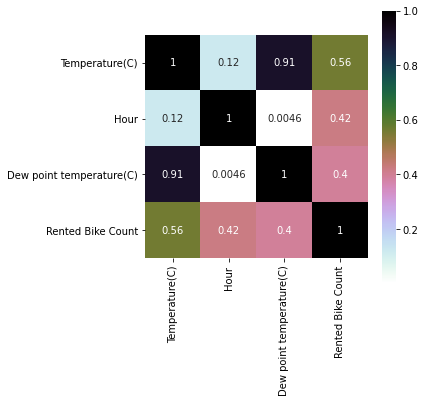

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [23]:
train, val = train_test_split(df_train, test_size=0.30)

In [24]:
train_x = train.drop('Rented Bike Count', axis=1)
train_y = train['Rented Bike Count']

In [25]:
val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (4147, 3)
Dimension of train_y dataframe: (4147,)
Dimension of val_x dataframe: (1778, 3)
Dimension of val_y dataframe: (1778,)


In [26]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 341.1568795943065
Mean Square Error of linear regression: 211512.33752461648
R_Squared Score of linear regression: -0.08838761583211152


In [28]:
predict_test = ln_reg.predict(df_test)
predict_test

array([ 726.15398058, 1102.8588665 ,  958.78411974, ..., 1367.86064469,
        656.70774243,  100.36924204])

In [29]:
test.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Id'],
      dtype='object')

In [30]:
submission_data = pd.DataFrame({"Id": test.Id , 'Pred_Bike_Count':predict_test})

submission_data['Actual_bikes_Rented']= test['Rented Bike Count']
df = submission_data.head(30).sort_values(by = 'Id')

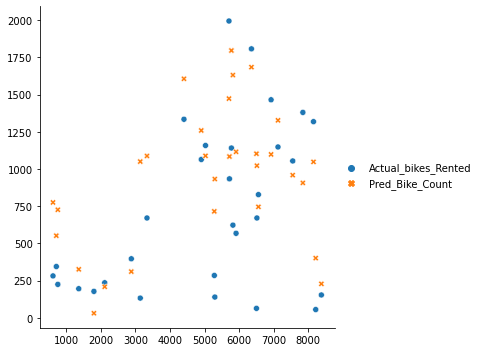

In [31]:
'''
1) What are the factors that influence the number of bikes rented? 

Ans: The factors that influenced the influenced the number of bikes rented is 
[Temperature(C), Hour, Dew point temperature(C)].

2) Explore the data for outliers and missing values.

There are no missing values in this dataset, and no absolute outliers.

3) Plot the correlation between the variables and state your comments

Temperature has a very stong correlation with the number of bikes rented.

4) Please build a linear regression model to predict rented bike count by 
choosing appropriate independentvariables.
5) Coment on Model performance by using approapriate diagnostics and measures.

The model didn't perform very well because the data is very spread out thus
giving us a very high mean squared error.
'''
df = df[['Actual_bikes_Rented', 'Pred_Bike_Count']]
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(
    data=df,
);